# Brute Force and Dynamic Programming approach to solve TSP for Drones

By Gowtham Chandrasekaran

# Import libraries

In [1]:
# For handling dataframes
import pandas as pd
# For Keeping track of runtime
import time
# Importing infinity equivalent
from sys import maxsize
# For generating permutations of routes
from itertools import permutations
# For plotting
import matplotlib.pyplot as plt

# Update the csv data location at the time of running

# Import Data

In [2]:
# df is the dataframe that has the location data
df = pd.read_csv("/Users/gowthamc/Desktop/SJSU/Fall 2022/CS255/project/dataset/25_parks_around_sjsu_lat_long.csv")

In [3]:
# Seeing the head of the dataframe
df.head()

,Unnamed: 0,Address,latitude,longitude
0,0,"1 Washington Sq, San Jose, CA 95192",37.340000,-121.880000
1,1,"N 2nd St &, E St James St, San Jose, CA 95112",37.339628,-121.891679
2,2,"E William St & S 16th St, San Jose, CA 95112",37.335841,-121.869643
3,3,"310 W San Fernando St #286, San Jose, CA 95113",37.331541,-121.894753
4,4,"W St James St, San Jose, CA 95110",37.338199,-121.894729


# Haversine Formula to calculate distance between two locations

In [4]:
# Import mathematical functions
from math import radians, cos, sin, asin, sqrt
# Returns the distance between two locations having lat and long
def haversine(lat1, lon1, lat2, lon2):
    """
    Fucntion Description:
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)

    Variables:
    long1 - longitude of the first location
    long2 - longitude of the second location
    lat1 - latitude of the first location
    lat2 - latitude of the second location
    dlong - difference between longitudes
    dlat - difference between latitudes
    km - holds the final distance in kms
    a - holds the intermediate result of the distance
    c - holds the intermediate result of the distance
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

# Computing the adjacency matrix

In [5]:
# Graph holds the adjacency matrix
graph = [[0 for i in range(25)] for j in range(25)]

for i, row in df.iterrows():
    for j, row in df.iterrows():
        # Distance betweeen itself is 0
        if i == j:
            graph[i][j] = 0
        # Computing distance between two points using haversine
        else:
            graph[i][j] = haversine(df.iloc[i]["latitude"], df.iloc[i]["longitude"], df.iloc[j]["latitude"], df.iloc[j]["longitude"])

In [6]:
# To pretty print the adjacency matrix
import pprint
pprint.pprint(graph)

[[0,
  1.033361637572846,
  1.025805066481633,
  1.608129681490159,
  1.3174627005955968,
  0.9894455233404585,
  1.3393137936754025,
  1.9292284960142607,
  1.8076959534459627,
  2.0400354474866513,
  1.258867305609958,
  2.3898541205602752,
  0.9629896227759807,
  1.4014290084849361,
  1.4594924938401428,
  2.8518138763261267,
  1.2245353779055177,
  1.7531126166846454,
  2.77634488518524,
  2.578742826466106,
  2.5636661799073903,
  1.7280671098777303,
  2.567344194999138,
  1.9430550004784164,
  1.9313281026753084],
 [1.033361637572846,
  0,
  1.9932229432605142,
  0.9394882008540194,
  0.3129804272807364,
  1.4294511066944526,
  1.3937199802774398,
  0.9862783485699181,
  2.237983767042387,
  1.0225016874704371,
  0.8279514005684379,
  2.242155287814365,
  0.8049570868380116,
  2.369999814463352,
  0.5583267758445625,
  2.848432980098025,
  0.8688996600239566,
  1.2742638330019096,
  2.9658322156255297,
  3.0667902185986247,
  1.6987415592583406,
  0.8649941861708197,
  1.61137669

# Brute Force Implementation

Trying for 0 to 10.

In [7]:
#run times
bf_rt = []
# min_costs
bf_min_cost = []
# min paths
bf_min_path = []
#run time plot (x,y)
rt_plot = []


In [8]:
'''
Function Description:
Functions to perform brute force implementation of TSP

Variables:
vertex - holds all possible vertices or locations
min_path - keeps track of minimum cost
next_permtuation - to iterate over permutations of routes
path - to store path of the locations visited
curr_pathwt - holds the current cost of the path
k - next location
s - starting location
V - Number of locations to visit
prev_path - holds the previous path taken
path - holds the best path to take

'''
def travellingSalesmanProblem(graph, s, V):
 
    # store all vertex apart from source vertex
    vertex = []
    for i in range(V):
        if i != s:
            vertex.append(i)
 
    # store minimum weight Hamiltonian Cycle
    min_path = maxsize
    next_permutation=permutations(vertex)
    path = []
    #Iterate Over all permutations
    for i in next_permutation:
 
        # store current Path weight(cost)
        curr_pathwt = 0
 
        # compute current path weight
        k = s
        for j in i:
            # Add all weights
            curr_pathwt += graph[k][j]
            # Set to next location
            k = j
        curr_pathwt += graph[k][s]
 
        # update minimum
        prev_path = min_path
        min_path = min(min_path, curr_pathwt)
        if prev_path != min_path:
            path = i
         
    return path,min_path



In [9]:
def compute_brute_force():
    '''
    Function Description:
    To solve TSP and plot runtime graph

    Variables:
    start_time - current time
    path - best path
    min_cost - best cost 
    rt - computed run time 
    bf_rt - list storing all run times
    rt_plot - list storing tuple of number of locations and time taken to solve it
    bf_min_cost - list storing all min costs
    bf_min_path - list storing all min cost paths
    '''
    for i in range(13):
        start_time = time.time()
        path, min_cost = travellingSalesmanProblem(graph, 0, i)
        rt = (time.time() - start_time)*1000
        bf_rt.append(rt)
        rt_plot.append((i,rt))
        path = list(path)
        path.insert(0,0)
        path.append(0)
        for i in range(len(path)):
            path[i] += 1
        bf_min_cost.append(min_cost)
        bf_min_path.append(path)

In [10]:
compute_brute_force()
print(rt_plot)

[(0, 0.012159347534179688), (1, 0.0040531158447265625), (2, 0.0057220458984375), (3, 0.0057220458984375), (4, 0.013113021850585938), (5, 0.04100799560546875), (6, 0.20885467529296875), (7, 1.363992691040039), (8, 14.238834381103516), (9, 56.932926177978516), (10, 289.84975814819336), (11, 3215.9438133239746), (12, 37724.18808937073)]


# Plot runtime graph

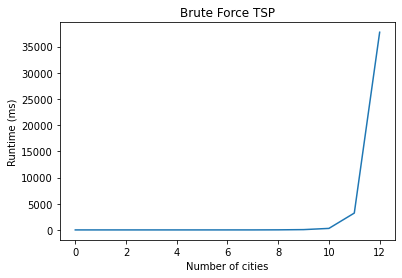

In [11]:
# Plotting the runtime graph for brute force
plt.plot(*zip(*rt_plot))
plt.title("Brute Force TSP")
plt.xlabel("Number of cities")
plt.ylabel("Runtime (ms)")
plt.show()

The brute force does not make sense to run for v=25 as it needs to create and run for 25! permutations. The value of 25! is 15511210043330985984000000 which is Fifteen Septillion Five Hundred Eleven Sextillion Two Hundred Ten Quintillion Forty-Three Quadrillion Three Hundred Thirty Trillion Nine Hundred Eighty-Five Billion Nine Hundred Eighty-Four Million. So we need to use a better approach to solve the TSP.

# The time complexity of the brute force method is O(n!)

# Dynamic programming approach

In [7]:
def compute_dp():
    '''
    Function Description:
    Top Down Memoization Dynamic Programming approach to solve TSP

    Variables:
    dp_min_cost - list storing all min costs computed
    dp_rt - list storing all run times of dp approach
    dp_plot - list maintained to plot rt for dp
    dist - adjacency matrix padded with 0s
    dp - memoization table
    ans - stores final min cost
    rt - run time
    
    '''
    dp_min_cost = []
    dp_rt = []
    dp_plot = []
    #adjacency matrix needs to be padded with 0s for the dp approach
    dist = [[0 for _ in range(26)] for _ in range(26)]
    for i in range(1,len(dist)):
        for j in range(1,len(dist[0])):
            dist[i][j] = graph[i-1][j-1]
    
    # cur represents the current location and mask represents the locations visited in terms of bits
    def tsp_dp(cur, mask):
        '''
        Function Description:
        Recursive call for DP TSP

        Variables:
        mask - bitmasking to keep track of all visited locations
        cur - current visited location
        min_cost - to keep track of min cost
        nxt - next location to visit

        '''
        # if all locations are visited and need to go back to the starting location return dist. bet. curr. loc. and start loc
        if mask == ((1 << cur) | 3):
            return dist[1][cur]

        # To avoid computation of overlapping subproblems where -1 represents that the best ans was not yet computed and anything else represents the best answer from that location
        if dp[cur][mask] != -1:
            return dp[cur][mask]

        # Initially set to some max value
        min_cost = 10**9

        # Try to go to the next unvisited location
        for nxt in range(1, n+1):
            # mask&(1<<nxt) !=0 means nxt is not visited
            # nxt != cur means that we dont travel to the same location
            # nxt != 1 means that next location is not the start location
            if (mask & (1 << nxt)) != 0 and nxt != cur and nxt != 1:
                # set the result to the minimum cost that we get by traveling through this nxt location in recursion
                # mask & (~(1 << cur)) marks the location visited
                min_cost = min(min_cost, tsp_dp(nxt, mask & (~(1 << cur))) + dist[nxt][cur])
        # Update memoization table
        dp[cur][mask] = min_cost 
        return min_cost
    
    for n in range(21):
        start_time = time.time()
        
        # initialising dp memoization
        dp = [[-1]*(1 << (n+1)) for _ in range(n+1)]
        #Initialise to max value for min distance
        ans = 10**9
        for i in range(1, n+1):
            ans = min(ans, tsp_dp(i, (1 << (n+1))-1) + dist[i][1])
        rt = (time.time() - start_time)*1000
        dp_min_cost.append(ans)
        dp_rt.append(rt)
        dp_plot.append((n,rt))
    return dp_plot
    

In [8]:
dp_plot = compute_dp()
print(dp_plot)

[(0, 0.010967254638671875), (1, 0.010967254638671875), (2, 0.0171661376953125), (3, 0.035762786865234375), (4, 0.10800361633300781), (5, 0.34880638122558594), (6, 1.0688304901123047), (7, 3.506898880004883), (8, 9.114742279052734), (9, 16.075849533081055), (10, 30.10272979736328), (11, 42.14024543762207), (12, 81.03489875793457), (13, 192.2323703765869), (14, 450.9470462799072), (15, 1076.211929321289), (16, 2409.2490673065186), (17, 5638.684034347534), (18, 13045.18723487854), (19, 29738.203763961792), (20, 67300.6329536438)]


# Plot runtime graph

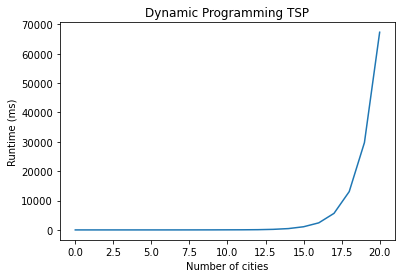

In [9]:
plt.plot(*zip(*dp_plot))
plt.title("Dynamic Programming TSP")
plt.xlabel("Number of cities")
plt.ylabel("Runtime (ms)")
plt.show()

# The time complexity of the dynammic programming approach is O(n**2 x 2^n)

Let's try running it for all 25 locations.

# Warning! The below code will take around 3 hours to compute

In [28]:
'''
Same as above cell. But running for all 25 locations
'''
%%time
n = 25 

dp = [[-1]*(1 << (n+1)) for _ in range(n+1)]

def tsp_dp(i, mask):
    if mask == ((1 << i) | 3):
        return dist[1][i]
 
    if dp[i][mask] != -1:
        return dp[i][mask]
 
    res = 10**9

    for j in range(1, n+1):
        if (mask & (1 << j)) != 0 and j != i and j != 1:
            res = min(res, tsp_dp(j, mask & (~(1 << i))) + dist[j][i])
    dp[i][mask] = res 
    return res
 

ans = 10**9
for i in range(1, n+1):
    
    ans = min(ans, tsp_dp(i, (1 << (n+1))-1) + dist[i][1])
    
print("The cost of most efficient tour = " + str(ans))

The cost of most efficient tour = 18.90988281030891
CPU times: user 1h 9min 21s, sys: 58min 35s, total: 2h 7min 57s
Wall time: 2h 56min 29s


It took roughly 3 hours to compute the answer. 